In [2]:
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest

In [3]:
df = pd.read_csv('data.csv')

In [4]:
features = ['ITEMID', 'OprID', 'WORKER', 'WrkCtrID']
data = df.loc[:, features]
data.loc[:, ('WORKER')] = data['WORKER'].astype(str)
data.loc[:, ('WrkCtrID')] = data['WrkCtrID'].astype(str)
df['TIME_DEVIATION'] = df['CalcHours'] - df['Hours']
X = df['TIME_DEVIATION'].to_numpy().reshape(-1, 1)

In [15]:
detector = LocalOutlierFactor(n_neighbors=5)
y_pred = detector.fit_predict(X)

# svmOneClass = svm.OneClassSVM(kernel="rbf", gamma=1)
# y_pred = svmOneClass.fit(X).predict(X)

# ee = EllipticEnvelope()
# y_pred = ee.fit(X).predict(X)

# iso = IsolationForest(random_state=42)
# y_pred = iso.fit(X).predict(X)

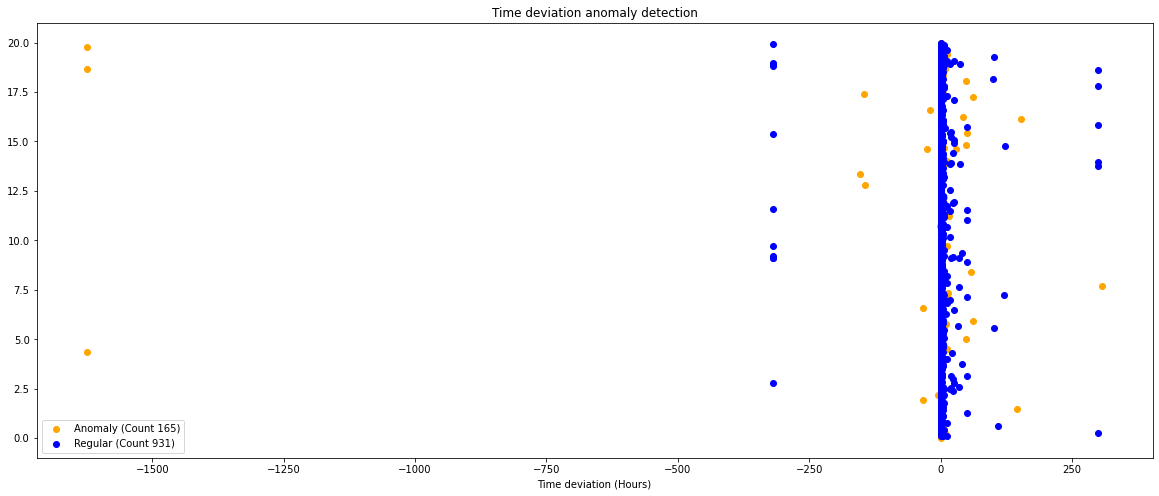

In [16]:
df['anomaly'] = y_pred
fig, ax = plt.subplots(figsize = (20, 8))

for i, cluster in df.groupby('anomaly'):
    y = []
    for _ in range(len(cluster['TIME_DEVIATION'])):
        y.append(random.random() * 20)
    label = 'Anomaly' if i == -1 else 'Regular'
    label += " (Count {0})".format(len(y))
    color = 'blue' if i == 1 else 'orange'
    _ = ax.scatter(cluster['TIME_DEVIATION'], y, color=color, label=label)


ax.legend(loc="lower left")
ax.set_title('Time deviation anomaly detection')
ax.set_xlabel('Time deviation (Hours)')
plt.show()

In [17]:
regular = df[df.anomaly == 1]
regular.to_csv("regular.csv")